In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

sns.set(
    'paper', font_scale=3.0,
        rc={'lines.linewidth': 2,
            'text.usetex' : True,
            'image.interpolation': 'nearest',
            'image.cmap': 'gray',
            'figure.figsize': (6.0, 5.0),
            'legend.frameon': True,
            'legend.fancybox': True,
            }
       )
sns.set_style('whitegrid', {'axes.grid' : False})
sns.set_palette('colorblind', color_codes=True)

In [3]:
def smooth_l1(x, gamma=1. / 9):
    """
    very similar to the smooth_l1_loss from pytorch, but with
    the extra beta parameter
    """
    n = np.abs(x)
    cond = n < gamma
    l1 = np.where(cond, 0.5 * n ** 2 / gamma, n - 0.5 * gamma)
    
    return l1

In [4]:
b1=1
b2=1./9

x = np.arange(-2,2,0.01)

y = smooth_l1(x, b1)
y2 = smooth_l1(x, b2)

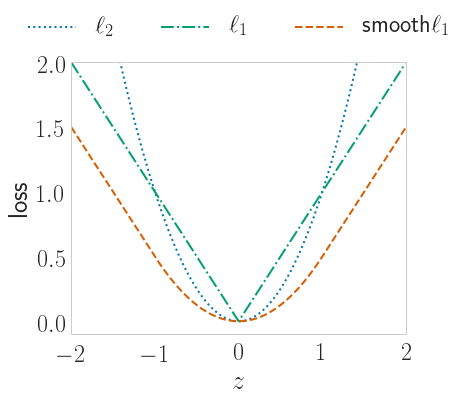

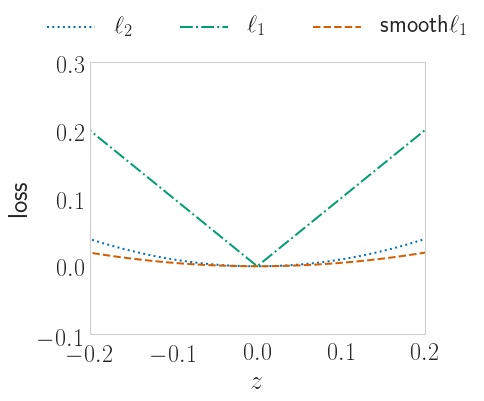

In [5]:
plt.figure
plt.plot(x, x**2, ':')
plt.plot(x,np.abs(x), '-.')
plt.plot(x,y, '--')
plt.legend(['$\ell_2$','$\ell_1$', r'smooth$\ell_1$'],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.25),
           fancybox=True,
           ncol=3,
           )

plt.xlim([np.min(x),int(np.max(x)+1)])
plt.ylim([-0.1,2])

plt.xlabel('$z$')
plt.ylabel('loss')

# Turn off tick labels
ax = plt.gca()
# ax.set_yticklabels([])
# ax.set_xticklabels([])
plt.savefig('l2xl1xsmoothl1.pdf',bbox_inches='tight')
plt.show()

###-----zoom

plt.plot(x, x**2, ':')
plt.plot(x,np.abs(x), '-.')
plt.plot(x,y, '--')
plt.legend(['$\ell_2$','$\ell_1$', r'smooth$\ell_1$'],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.25),
           fancybox=True,
           ncol=3,
           )



plt.xlim([-0.2,0.2])
plt.ylim([-0.1,0.3])

plt.xlabel('$z$')
plt.ylabel('loss')


# Turn off tick labels
ax = plt.gca()
# ax.set_yticklabels([])
# ax.set_xticklabels([])
plt.savefig('l2xl1xsmoothl1_zoom.pdf',bbox_inches='tight')
plt.show()

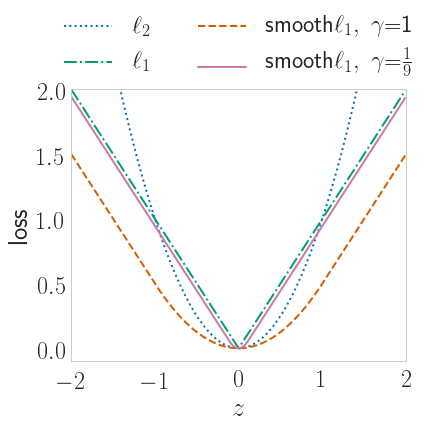

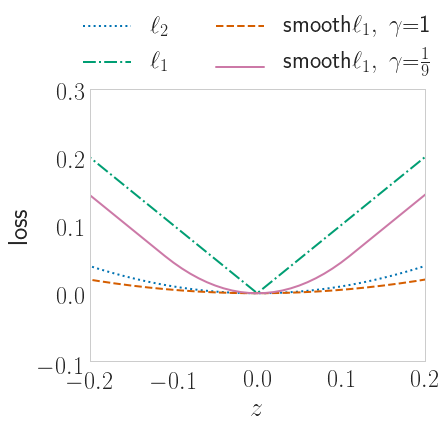

In [6]:
plt.plot(x, x**2, ':')
plt.plot(x,np.abs(x), '-.')
plt.plot(x,y, '--')
plt.plot(x,y2, '-')
plt.xlabel('$z$')
plt.ylabel('loss')
plt.xlim([np.min(x),int(np.max(x)+1)])
plt.ylim([-0.1,2])
plt.legend(['$\ell_2$',
            '$\ell_1$',
            r'smooth$\ell_1,~\gamma$={:d}'.format(b1),
            r'smooth$\ell_1,~\gamma$={$\frac{1}{9}$}'],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.35),
           fancybox=True,
           ncol=2,
           )
# Turn off tick labels
ax = plt.gca()
# ax.set_yticklabels([])
# ax.set_xticklabels([])
plt.savefig('smooth_l1_gamma.pdf',bbox_inches='tight')
plt.show()

plt.plot(x, x**2, ':')
plt.plot(x,np.abs(x), '-.')
plt.plot(x,y, '--')
plt.plot(x,y2, '-')
plt.xlabel('$z$')
plt.ylabel('loss')
plt.xlim([-0.2,0.2])
plt.ylim([-0.1,0.3])
plt.legend(['$\ell_2$',
            '$\ell_1$',
            r'smooth$\ell_1,~\gamma$={:d}'.format(b1),
            r'smooth$\ell_1,~\gamma$={$\frac{1}{9}$}'],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.35),
           fancybox=True,
           ncol=2,
           )
# Turn off tick labels
ax = plt.gca()
# ax.set_yticklabels([])
# ax.set_xticklabels([])
plt.savefig('smooth_l1_gamma_zoom.pdf',bbox_inches='tight')
plt.show()


In [7]:
def huber(x, gamma):
    """
    very similar to the smooth_l1_loss from pytorch, but with
    the extra beta parameter
    """
    n = np.abs(x)
    cond = n < beta
    H = np.where(cond, 0.5 * n ** 2, beta*(n-0.5*beta))
    
    return H

In [8]:
def huber_approx(x, b):
    H_app = b**2*(np.sqrt(1+(x/b)**2)-1)
    return H_app

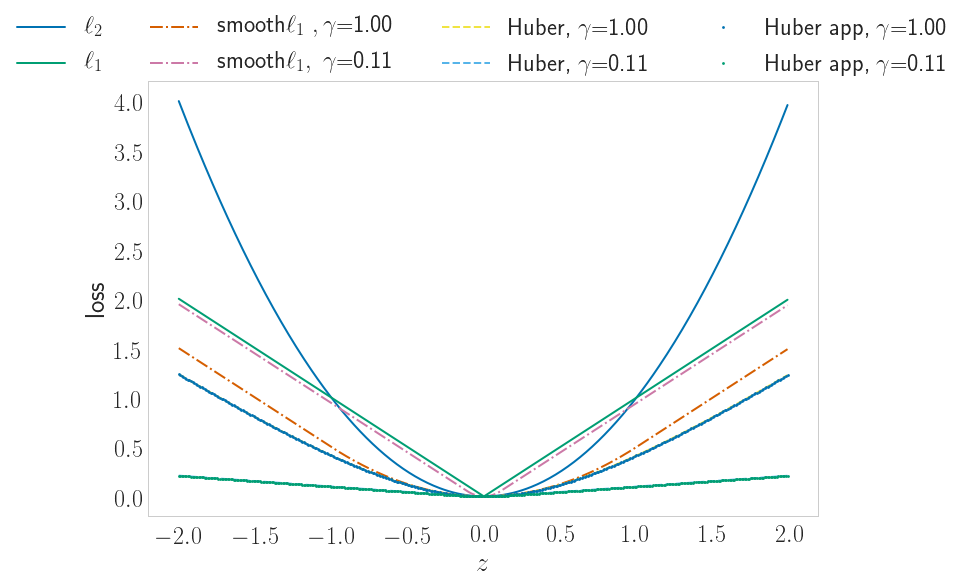

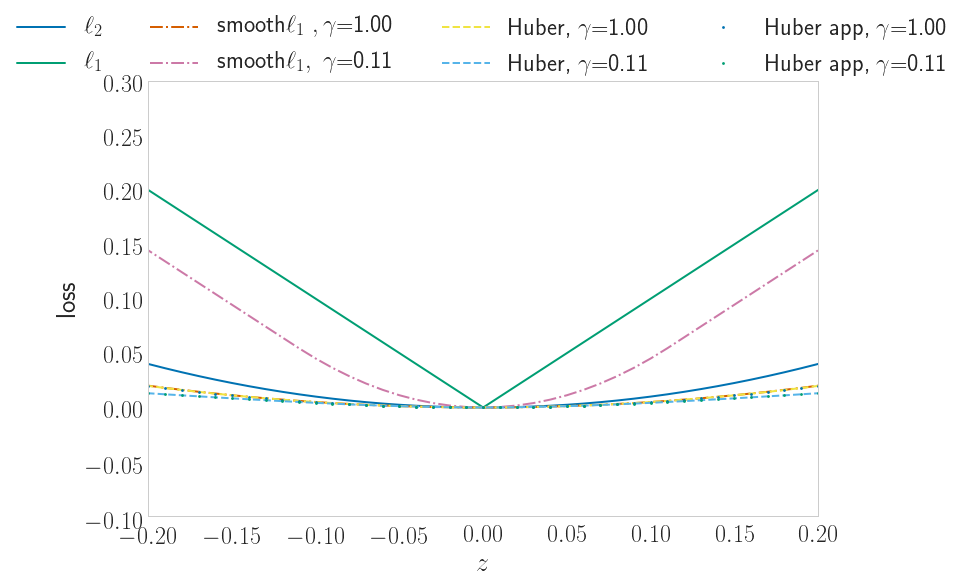

In [24]:
H_1 = huber_approx(x, b1)
H_2 = huber_approx(x, b2)

H_app1 = huber_approx(x, b1)
H_app2 = huber_approx(x, b2)

plt.figure(figsize=(12,8))

plt.plot(x, x**2, '-')
plt.plot(x,np.abs(x), '-')

plt.plot(x,y, '-.')
plt.plot(x,y2, '-.')

plt.plot(x, H_1, '--')
plt.plot(x, H_2, '--')

plt.plot(x, H_app1, '.')
plt.plot(x, H_app2, '.')

plt.xlabel('$z$')
plt.ylabel('loss')
# plt.xlim([-0.2,0.2])
# plt.ylim([-0.1,0.3])
plt.legend(['$\ell_2$',
            '$\ell_1$', 
             r'smooth$\ell_1~,\gamma$={:.2f}'.format(b1), 
             r'smooth$\ell_1,~\gamma$={:.2f}'.format(b2),
            'Huber, $\gamma$={:.2f}'.format(b1),
           'Huber, $\gamma$={:.2f}'.format(b2),
           'Huber app, $\gamma$={:.2f}'.format(b1),
           'Huber app, $\gamma$={:.2f}'.format(b2)],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.2),
           fancybox=True,
           ncol=4,
           )


plt.show()

plt.figure(figsize=(12,8))

plt.plot(x, x**2, '-')
plt.plot(x,np.abs(x), '-')

plt.plot(x,y, '-.')
plt.plot(x,y2, '-.')

plt.plot(x, H_1, '--')
plt.plot(x, H_2, '--')

plt.plot(x, H_app1, '.')
plt.plot(x, H_app2, '.')

plt.xlabel('$z$')
plt.ylabel('loss')
plt.xlim([-0.2,0.2])
plt.ylim([-0.1,0.3])
plt.legend(['$\ell_2$',
            '$\ell_1$', 
             r'smooth$\ell_1~,\gamma$={:.2f}'.format(b1), 
             r'smooth$\ell_1,~\gamma$={:.2f}'.format(b2),
            'Huber, $\gamma$={:.2f}'.format(b1),
           'Huber, $\gamma$={:.2f}'.format(b2),
           'Huber app, $\gamma$={:.2f}'.format(b1),
           'Huber app, $\gamma$={:.2f}'.format(b2)],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.2),
           fancybox=True,
           ncol=4,
           )


plt.show()